# Imbalanced learn

In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from termcolor import colored

from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

Read in training data:

In [3]:
X_train = pd.read_csv('../data/train/X_train.csv')
y_train_type = np.ravel(pd.read_csv('../data/train/y_train_type.csv'))
y_train_age = np.ravel(pd.read_csv('../data/train/y_train.csv'))

Read in test data:

In [4]:
X_test = pd.read_csv('../data/test/X_test.csv')
y_test_type = np.ravel(pd.read_csv('../data/test/y_test_type.csv'))
y_test_age = np.ravel(pd.read_csv('../data/test/y_test.csv'))

In [5]:
def showHist(data):
#     plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,8))
    plt.hist(data)
    plt.xticks(rotation=50)
    plt.title("Histogram")
    plt.show()

In [6]:
def predictAndReport(model, X, Y):
    pred = model.predict(X)
    print('Confusion matrix: \n', confusion_matrix(Y, pred))
    print('\nClassification report: \n', classification_report(Y, pred, zero_division=True))

In [7]:
def getBestParams(X, y):
    params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False]
         }

    multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=3, verbose=5)
    multinomial_nb_grid.fit(X,y)

    print('Best accuracy : {:.3f}'.format(multinomial_nb_grid.best_score_))
    return multinomial_nb_grid.best_params_['alpha'], multinomial_nb_grid.best_params_['fit_prior']

# -----------------------------------------------------------------------------------------------

# Classes from atribute type 

In [8]:
# X_train_type, X_val_type, y_train_type, y_val_type = train_test_split(X_train, y_train_type, train_size=0.7)

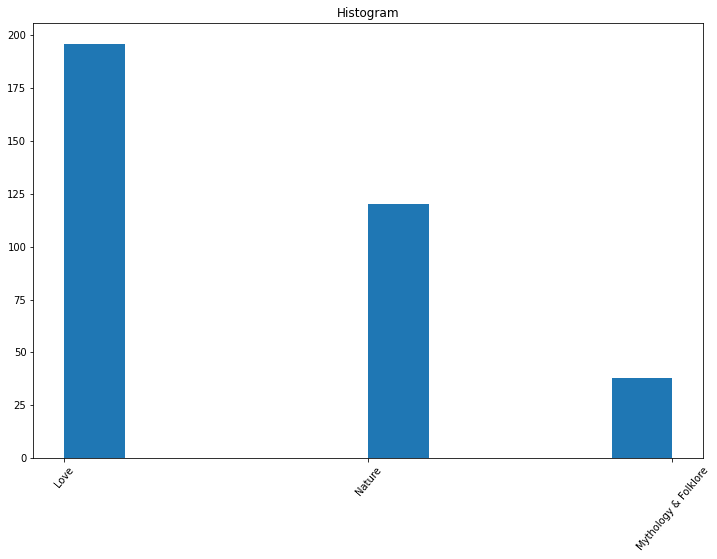

In [9]:
showHist(y_train_type)

## SVM without any imbalanced learn method

In [117]:
model = svm.SVC(C=0.2, kernel='linear', degree=3, probability=False)
model.fit(X_train, y_train_type)

SVC(C=0.2, kernel='linear')

Prediction on train data:

In [118]:
predictAndReport(model, X_train, y_train_type)

Confusion matrix: 
 [[196   0   0]
 [ 36   0   2]
 [ 93   0  27]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.60      1.00      0.75       196
Mythology & Folklore       1.00      0.00      0.00        38
              Nature       0.93      0.23      0.36       120

            accuracy                           0.63       354
           macro avg       0.84      0.41      0.37       354
        weighted avg       0.76      0.63      0.54       354



In [119]:
# predictAndReport(model, X_test, y_test_type)

Confusion matrix: 
 [[81  0  1]
 [20  0  1]
 [43  0  6]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.56      0.99      0.72        82
Mythology & Folklore       1.00      0.00      0.00        21
              Nature       0.75      0.12      0.21        49

            accuracy                           0.57       152
           macro avg       0.77      0.37      0.31       152
        weighted avg       0.68      0.57      0.45       152



## SVM with over sampling method

In [106]:
# rov = RandomOverSampler(random_state = 42, sampling_strategy='minority')
# X_resampled1, y_resampled2 = rov.fit_resample(X_train, y_train_type)
# ruv = RandomUnderSampler(random_state = 42, sampling_strategy='auto')
# X_resampled, y_resampled = ruv.fit_resample(X_resampled1, y_resampled2)

# smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state = 42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train_type)


rov = RandomOverSampler(random_state = 42, sampling_strategy='auto')
X_resampled, y_resampled = rov.fit_resample(X_train, y_train_type)

In [120]:
model = svm.SVC(C=0.1, kernel='linear', degree=3, probability=False)

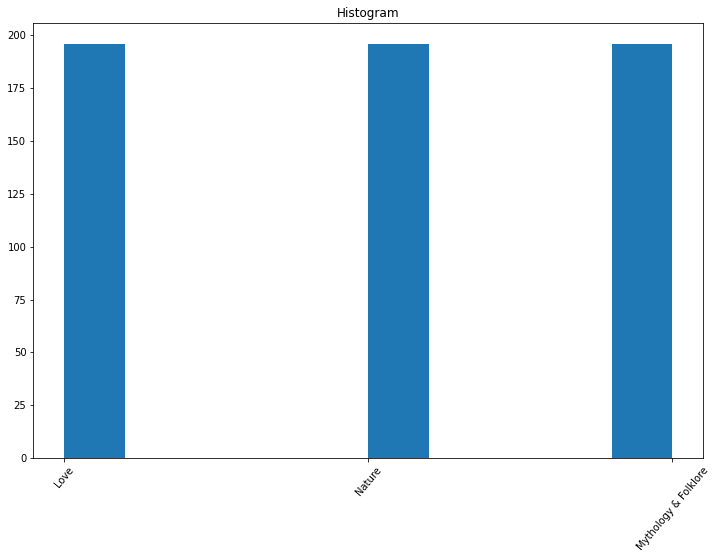

In [121]:
showHist(y_resampled)

In [122]:
model.fit(X_resampled, y_resampled)

SVC(C=0.1, kernel='linear')

Prediction on train data:

In [123]:
predictAndReport(model, X_train, y_train_type)

Confusion matrix: 
 [[196   0   0]
 [ 15  21   2]
 [ 81   1  38]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.67      1.00      0.80       196
Mythology & Folklore       0.95      0.55      0.70        38
              Nature       0.95      0.32      0.47       120

            accuracy                           0.72       354
           macro avg       0.86      0.62      0.66       354
        weighted avg       0.80      0.72      0.68       354



### Prediction on test data:

In [124]:
predictAndReport(model, X_test, y_test_type)

Confusion matrix: 
 [[80  1  1]
 [16  2  3]
 [39  0 10]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.59      0.98      0.74        82
Mythology & Folklore       0.67      0.10      0.17        21
              Nature       0.71      0.20      0.32        49

            accuracy                           0.61       152
           macro avg       0.66      0.42      0.41       152
        weighted avg       0.64      0.61      0.52       152



# -----------------------------------------------------------------------------------------------

# Classes from atribute age 

In [18]:
# X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train, y_train_age, train_size=0.7)

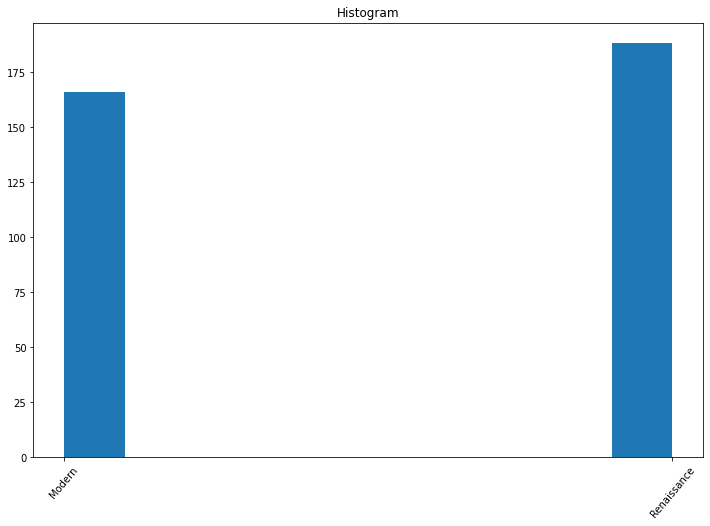

In [19]:
showHist(y_train_age)

## SVM without any imbalanced learn method

In [20]:
# alpha, fp = getBestParams(X_train, y_train_age)

In [21]:
model = svm.SVC(C=0.5, kernel='linear', degree=3, probability=False)
model.fit(X_train, y_train_age)

SVC(C=0.5, kernel='linear')

Prediction on train data:

In [22]:
predictAndReport(model, X_train, y_train_age)

Confusion matrix: 
 [[163   3]
 [  0 188]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      0.98      0.99       166
 Renaissance       0.98      1.00      0.99       188

    accuracy                           0.99       354
   macro avg       0.99      0.99      0.99       354
weighted avg       0.99      0.99      0.99       354



## SVM with over sampling method

In [23]:
smote = SMOTE(sampling_strategy='all', k_neighbors=23, random_state = 1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_age)

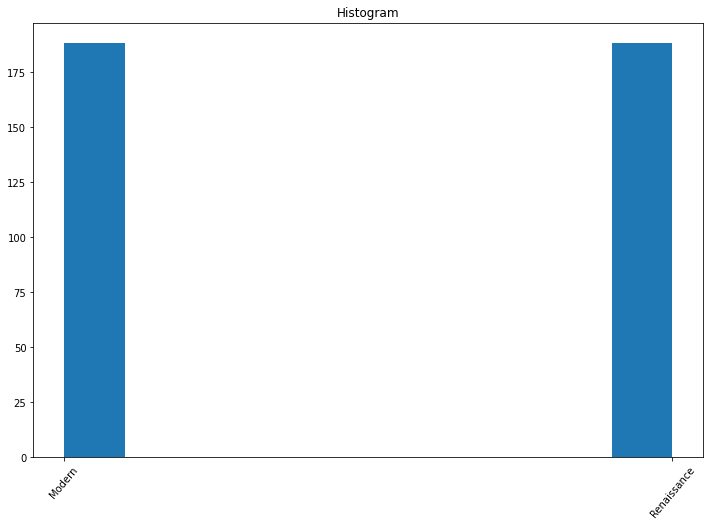

In [24]:
showHist(y_resampled)

In [25]:
model = svm.SVC(C=0.5, kernel='linear', degree=3, probability=False)

In [26]:
model.fit(X_resampled, y_resampled)

SVC(C=0.5, kernel='linear')

Prediction on train data:

In [27]:
predictAndReport(model, X_resampled, y_resampled)

Confusion matrix: 
 [[187   1]
 [  0 188]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      0.99      1.00       188
 Renaissance       0.99      1.00      1.00       188

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



### Prediction on test data:

In [28]:
predictAndReport(model, X_test, y_test_age)

Confusion matrix: 
 [[52  4]
 [ 3 93]]

Classification report: 
               precision    recall  f1-score   support

      Modern       0.95      0.93      0.94        56
 Renaissance       0.96      0.97      0.96        96

    accuracy                           0.95       152
   macro avg       0.95      0.95      0.95       152
weighted avg       0.95      0.95      0.95       152

